In [56]:
# Welcome to your new notebook
# Type here in the cell editor to add code!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyspark.sql.functions as F
import pyspark.sql.types as T
df = spark.sql("SELECT * FROM lakehouse_1_lab.sales LIMIT 1000")


StatementMeta(, 45f76c37-9e82-41d4-877d-1678df5b3bd4, 58, Finished, Available)

In [7]:
df.columns

StatementMeta(, 45f76c37-9e82-41d4-877d-1678df5b3bd4, 9, Finished, Available)

['SalesOrderNumber',
 'SalesOrderLineNumber',
 'OrderDate',
 'CustomerName',
 'EmailAddress',
 'Item',
 'Quantity',
 'UnitPrice',
 'TaxAmount']

In [57]:
display(df.describe())

StatementMeta(, 45f76c37-9e82-41d4-877d-1678df5b3bd4, 59, Finished, Available)

SynapseWidget(Synapse.DataFrame, 3f154b90-f16e-4e83-9fce-1fb1df50aece)

In [69]:
display(df.head(10))

StatementMeta(, 45f76c37-9e82-41d4-877d-1678df5b3bd4, 71, Finished, Available)

SynapseWidget(Synapse.DataFrame, 6c10d698-3026-4006-9148-7d5a204b3bd4)

StatementMeta(, 45f76c37-9e82-41d4-877d-1678df5b3bd4, 61, Finished, Available)

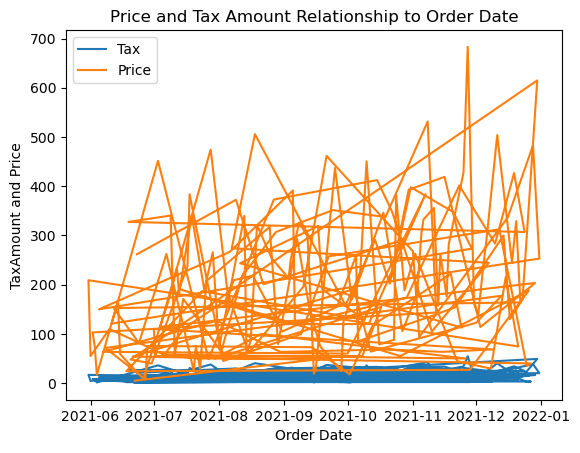

In [59]:
# Convert the 'OrderDate' column to a date type
df = df.withColumn('OrderDate', F.to_date('OrderDate').cast(T.DateType()))

# Group the data by 'OrderDate' and calculate the sum of 'TaxAmount' and 'UnitPrice'
grouped_df = df.groupBy('OrderDate').agg(F.sum('TaxAmount').alias('TaxAmount'), F.sum('UnitPrice').alias('Price'))

# Convert the DataFrame to Pandas DataFrame for plotting
pandas_df = grouped_df.toPandas()

# Plotting the data
plt.plot(pandas_df['OrderDate'], pandas_df['TaxAmount'], label='Tax')
plt.plot(pandas_df['OrderDate'], pandas_df['Price'], label='Price')
plt.legend()
plt.title('Price and Tax Amount Relationship to Order Date')
plt.ylabel('TaxAmount and Price')
plt.xlabel('Order Date')
plt.show()

StatementMeta(, 45f76c37-9e82-41d4-877d-1678df5b3bd4, 62, Finished, Available)

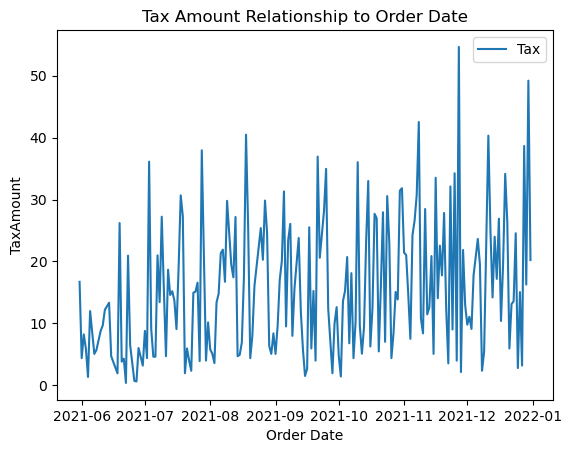

In [60]:
pandas_df.plot(x='OrderDate', y='TaxAmount', label='Tax', kind='line')

plt.legend()
plt.title('Tax Amount Relationship to Order Date')
plt.ylabel('TaxAmount')
plt.xlabel('Order Date')
plt.show()

StatementMeta(, 45f76c37-9e82-41d4-877d-1678df5b3bd4, 63, Finished, Available)

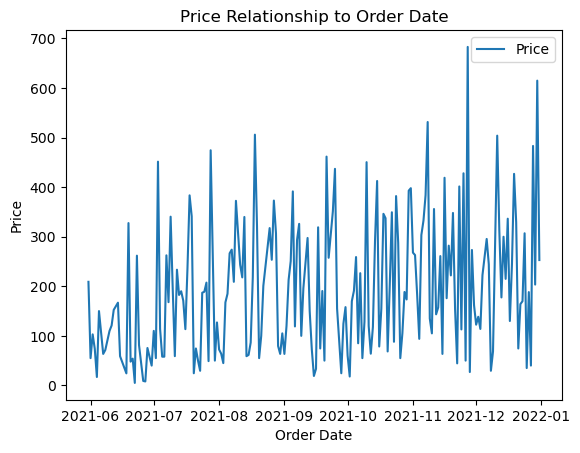

In [61]:

pandas_df.plot(x='OrderDate', y='Price', label='Price', kind='line')
plt.legend()
plt.title('Price Relationship to Order Date')
plt.ylabel('Price')
plt.xlabel('Order Date')
plt.show()

In [ ]:
#Implicit ingestion of Data Using PySpark's code
# df = spark.read.format("csv").option("header","true").load("Files/data/sales.csv")
# # df now is a Spark DataFrame containing CSV data from "Files/data/sales.csv".
# display(df)

In [70]:
# Data Ingestion Using Pandas DataFrame
import pandas as pd
# Load data into pandas DataFrame from "/lakehouse/default/" + "Files/data/sales.csv"
df = pd.read_csv("/lakehouse/default/" + "Files/data/sales.csv")
display(df.head(10))


StatementMeta(, 45f76c37-9e82-41d4-877d-1678df5b3bd4, 72, Finished, Available)

/opt/spark/python/lib/pyspark.zip/pyspark/sql/pandas/conversion.py:604: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  [(c, t) for (_, c), t in zip(pdf_slice.iteritems(), arrow_types)]


SynapseWidget(Synapse.DataFrame, 6f9938ff-8101-4f53-9323-46878a0910cc)

In [52]:
df.describe()

StatementMeta(, 45f76c37-9e82-41d4-877d-1678df5b3bd4, 54, Finished, Available)

,SalesOrderLineNumber,Quantity,UnitPrice,TaxAmount
count,32718.000000,32718.0,32718.000000,32718.000000
mean,1.813589,1.0,639.648586,51.171888
std,1.005108,0.0,1072.038921,85.763115
min,1.000000,1.0,2.290000,0.183200
25%,1.000000,1.0,8.990000,0.719200
50%,1.000000,1.0,34.990000,2.799200
75%,2.000000,1.0,782.990000,62.639200
max,8.000000,1.0,3578.270000,286.261600


In [53]:
df.ndim

StatementMeta(, 45f76c37-9e82-41d4-877d-1678df5b3bd4, 55, Finished, Available)

2

In [55]:
df.size

StatementMeta(, 45f76c37-9e82-41d4-877d-1678df5b3bd4, 57, Finished, Available)

294462